In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import utils # local file

#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.size'] = 17.0

In [2]:
matchid = 2
team = 'Huskies'

In [3]:
from network import build_network, plot_network

In [4]:
df = pd.read_csv('./2020_Problem_D_DATA/passingevents.csv')

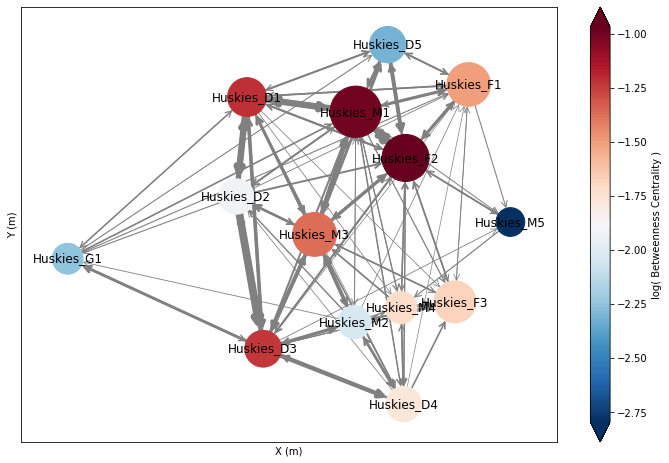

In [5]:
_ = plot_network(df, 'Huskies', matchid=20)

## Motifs

In [324]:
## We define each S* motif as a directed graph in networkx
## up=1, down=3, right=2
motifs = {
    'S1': nx.DiGraph([(2,1),(2,3)]),
    'S2': nx.DiGraph([(3,2),(2,1)]),
    'S3': nx.DiGraph([(3,2),(2,3),(2,1)]),
    'S4': nx.DiGraph([(3,1),(2,1)]),
    'S5': nx.DiGraph([(3,1),(2,1),(2,3)]),
    'S6': nx.DiGraph([(3,1),(2,1),(2,3),(3,2)]),
    'S7': nx.DiGraph([(3,2),(2,3),(1,2)]),
    'S8': nx.DiGraph([(3,2),(2,3),(2,1),(1,2)]),
    'S9': nx.DiGraph([(1,2),(2,3),(3,1)]),
    'S10': nx.DiGraph([(1,2),(2,3),(3,1),(2,1)]),
    'S11': nx.DiGraph([(1,2),(2,1),(3,2),(3,1)]),
    'S12': nx.DiGraph([(1,2),(2,1),(3,2),(2,3),(3,1)]),
    'S13': nx.DiGraph([(1,2),(2,1),(2,3),(3,2),(3,1),(1,3)])
    }

In [325]:
from utils import mcounter
motif_count, motif_weight = mcounter(G, motifs, weight_dict)

In [327]:
motif_count

{'S1': 4,
 'S2': 13,
 'S3': 43,
 'S4': 2,
 'S5': 11,
 'S6': 13,
 'S7': 19,
 'S8': 46,
 'S9': 0,
 'S10': 15,
 'S11': 9,
 'S12': 68,
 'S13': 45}

In [326]:
pd.Series(motif_weight).sort_values()

S9       0.000000
S4       1.864655
S1       4.412147
S2      16.325899
S5      17.614704
S11     27.074144
S6      50.778199
S7      52.525219
S10     53.783558
S3     120.969766
S8     191.604563
S12    363.270804
S13    363.944963
dtype: float64

## Structual parameters of a network

In [82]:
df = pd.read_csv('./2020_Problem_D_DATA/passingevents.csv')
df_matches = pd.read_csv('./2020_Problem_D_DATA/matches.csv')
df_matches[:3]

,MatchID,OpponentID,Outcome,OwnScore,OpponentScore,Side,CoachID
0,1,Opponent1,win,1,0,home,Coach1
1,2,Opponent2,tie,1,1,away,Coach1
2,3,Opponent3,loss,0,2,away,Coach1


In [83]:
from network import build_network, plot_network, calc_network_params

In [84]:
for ind, row in df_matches.iterrows():
    G, pos, centrality_dict, geometrical_dist, unidirection_pass, weight_dict = build_network(df, 
                                                                                              'Huskies', 
                                                                                              row['MatchID'])
    network_params = calc_network_params(G)
    df_matches.loc[ind, 'Huskies_network_params'] = str(network_params)
    
    G, pos, centrality_dict, geometrical_dist, unidirection_pass, weight_dict = build_network(df, 
                                                                                              row['OpponentID'], 
                                                                                              row['MatchID'])
    network_params = calc_network_params(G)
    df_matches.loc[ind, 'Opponent_network_params'] = str(network_params)

In [86]:
df_matches.to_csv('./matches_with_network_params.csv')